In [1]:

pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   --------------------- ----------------- 337.9/614.7 kB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 9.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.8 MB 24.4 MB/s eta 0:00:01
   ------------- -------------------------- 1.0/2.8 MB 12.1 MB/s eta 0:00:01
   ------------- -------------------------- 1.0/2.8 MB 12.1 MB/s eta 0:00:01
   ------------- -------------------------- 1.0/2.8 MB 12.1 MB/s eta 0:00:01
   ------------- -------------------------- 1.0/2.8 MB 5.1 MB/s eta 0:00:01
   --------------- ------------------------ 1.1/2.8 MB 4.3 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.8 MB 4.0 MB/s eta 0:00:01
   -------------------- ------------------- 1.5/2.8 MB 4.2 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.8 MB 4.2 MB/s eta 0:00:01
   ---------


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('MaunaLoaDailyTemps.csv',index_col='DATE',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


<Axes: xlabel='DATE'>

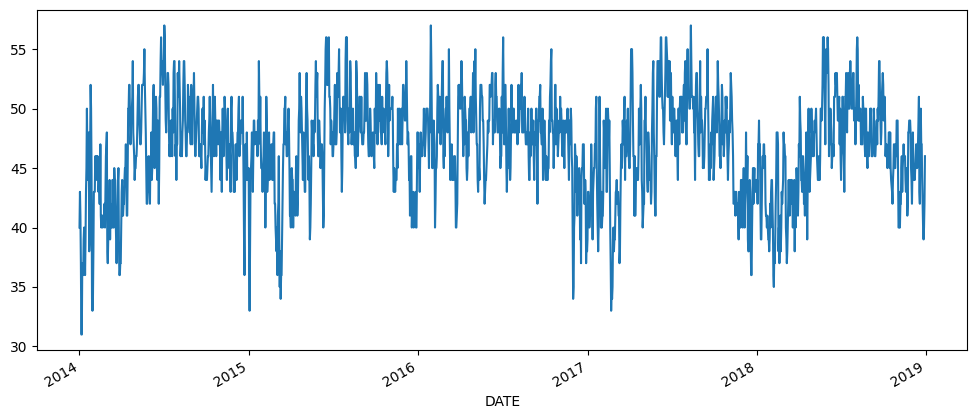

In [5]:
df['AvgTemp'].plot(figsize=(12,5))

In [6]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [7]:
adf_test(df['AvgTemp'])

1. ADF :  -6.55468012506878
2. P-Value :  8.67593748019951e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


In [8]:

from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [16]:

stepwise_fit = auto_arima(df['AvgTemp'], trace= True,
                          suppress_warnings=True)           

stepwise_fit.summary()
     

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.288, Time=0.91 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=0.62 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.323, Time=1.07 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.557, Time=1.02 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.189, Time=1.00 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.793, Time=1.30 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.018, Time=1.35 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.482, Time=1.70 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8306.457, Time=1.47 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.782
Date:                Tue, 28 May 2024   AIC                           8295.564
Time:                        19:26:46   BIC                           8339.621
Sample:                             0   HQIC                          8311.817
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3453      0.392      3.428      0.001       0.576       2.114
ar.L1          0.9711      0.008    115.044      0.000       0.955       0.988
ma.L1         -0.1242      0.024     -5.202      0.000      -0.171      -0.077
ma.L2         -0.2174      0.024     -8.947      0.000      -0.265      -0.170
ma.L3         -0.2037      0.024     -8.483      0.000      -0.251      -0.157
ma.L4         -0.1358      0.023     -5.957      0.000      -0.180      -0.091
ma.L5         -0.0472      0.024     -1.937      0.053      -0.095       0.001
sigma2         5.4897      0.172     31.995      0.000       5.153       5.826
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                21.38
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.18
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
from statsmodels.tsa.arima_model import ARIMA

In [11]:

print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1821, 5)
(1791, 5) (30, 5)
MinTemp      36.0
MaxTemp      52.0
AvgTemp      44.0
Sunrise     640.0
Sunset     1743.0
Name: 2018-12-01 00:00:00, dtype: float64 MinTemp      39.0
MaxTemp      52.0
AvgTemp      46.0
Sunrise     656.0
Sunset     1754.0
Name: 2018-12-30 00:00:00, dtype: float64


In [57]:

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as tsa

model = sm.tsa.arima.ARIMA(train['AvgTemp'],order=(1,3,5))
# model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 3, 5)   Log Likelihood               -4171.406
Date:                Tue, 28 May 2024   AIC                           8356.812
Time:                        20:11:50   BIC                           8395.234
Sample:                             0   HQIC                          8371.000
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9992      0.020    -48.850      0.000      -1.039      -0.959
ma.L1         -1.1370      0.280     -4.063      0.000      -1.685      -0.588
ma.L2         -1.1227      0.600     -1.873      0.061      -2.298       0.052
ma.L3          1.3984      0.287      4.881      0.000       0.837       1.960
ma.L4          0.1228      0.115      1.064      0.287      -0.103       0.349
ma.L5         -0.2615      0.079     -3.331      0.001      -0.415      -0.108
sigma2         6.1408      1.623      3.783      0.000       2.959       9.322
===================================================================================
Ljung-Box (L1) (Q):                   6.17   Jarque-Bera (JB):                25.42
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.16
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='DATE'>

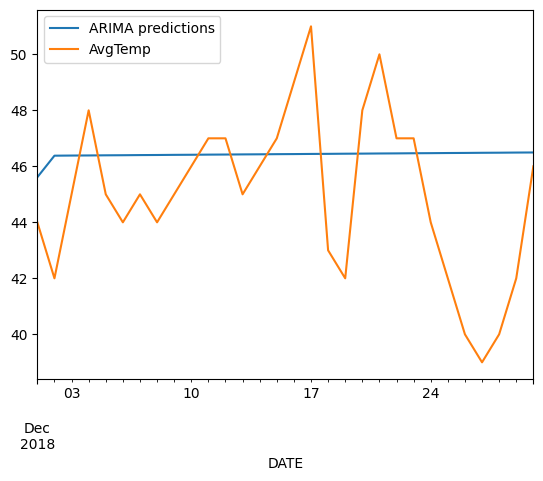

In [58]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.index=index_future_dates
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)
# pred

In [17]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [19]:
model_SARIMA=SARIMAX(train['AvgTemp'],order=(1,0,5))

In [20]:
model_SARIMA_fit=model_SARIMA.fit()

In [21]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4077.372
Date:                Tue, 28 May 2024   AIC                           8168.744
Time:                        19:28:46   BIC                           8207.178
Sample:                             0   HQIC                          8182.935
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   6785.388      0.000       1.000       1.000
ma.L1         -0.1516      0.023     -6.660      0.000      -0.196      -0.107
ma.L2         -0.2367      0.023    -10.492      0.000      -0.281      -0.192
ma.L3         -0.2255      0.023     -9.876      0.000      -0.270      -0.181
ma.L4         -0.1567      0.023     -6.938      0.000      -0.201      -0.112
ma.L5         -0.0679      0.024     -2.833      0.005      -0.115      -0.021
sigma2         5.5366      0.176     31.541      0.000       5.193       5.881
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 7.31
Prob(Q):                              0.88   Prob(JB):                         0.03
Heteroskedasticity (H):               0.82   Skew:                            -0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

2018-12-01    44.647278
2018-12-02    44.792442
2018-12-03    45.135670
2018-12-04    45.448431
2018-12-05    45.589583
2018-12-06    45.588061
2018-12-07    45.586538
2018-12-08    45.585015
2018-12-09    45.583493
2018-12-10    45.581971
2018-12-11    45.580448
2018-12-12    45.578926
2018-12-13    45.577404
2018-12-14    45.575882
2018-12-15    45.574359
2018-12-16    45.572837
2018-12-17    45.571315
2018-12-18    45.569793
2018-12-19    45.568271
2018-12-20    45.566749
2018-12-21    45.565228
2018-12-22    45.563706
2018-12-23    45.562184
2018-12-24    45.560662
2018-12-25    45.559141
2018-12-26    45.557619
2018-12-27    45.556098
2018-12-28    45.554576
2018-12-29    45.553055
2018-12-30    45.551533
Freq: D, Name: SARIMAX predictions, dtype: float64

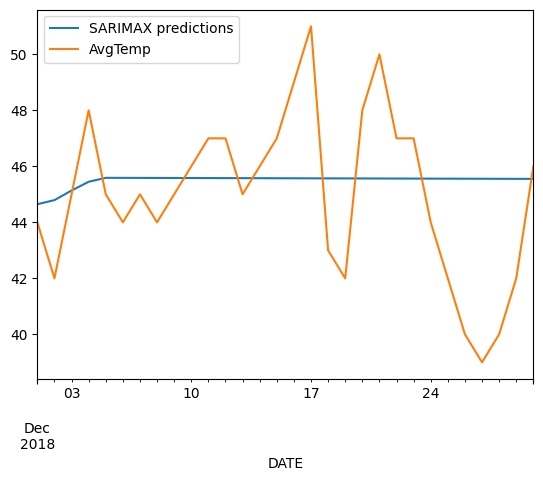

In [40]:

start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model_SARIMA_fit.predict(start=start,end=end,typ='levels').rename('SARIMAX predictions')
pred.index=index_future_dates
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)
pred

<Axes: xlabel='DATE'>

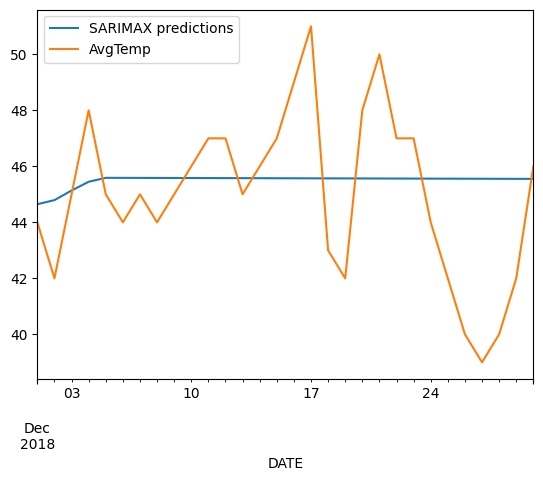

In [39]:
pred.plot(legend='ARIMA Predictions')
test['AvgTemp'].plot(legend=True)

In [25]:

test['AvgTemp'].mean()

45.0

In [26]:

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

2.8895728471123276


In [29]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

model2 = sm.tsa.arima.ARIMA(df['AvgTemp'],order=(1,0,5))
# model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


In [30]:

index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2018-12-30    46.418166
2018-12-31    46.113912
2019-01-01    45.617874
2019-01-02    45.249566
2019-01-03    45.116916
2019-01-04    45.136666
2019-01-05    45.156140
2019-01-06    45.175342
2019-01-07    45.194275
2019-01-08    45.212943
2019-01-09    45.231349
2019-01-10    45.249499
2019-01-11    45.267394
2019-01-12    45.285039
2019-01-13    45.302437
2019-01-14    45.319591
2019-01-15    45.336506
2019-01-16    45.353184
2019-01-17    45.369628
2019-01-18    45.385843
2019-01-19    45.401830
2019-01-20    45.417594
2019-01-21    45.433137
2019-01-22    45.448463
2019-01-23    45.463574
2019-01-24    45.478474
2019-01-25    45.493166
2019-01-26    45.507652
2019-01-27    45.521935
2019-01-28    45.536018
2019-01-29    45.549904
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: >

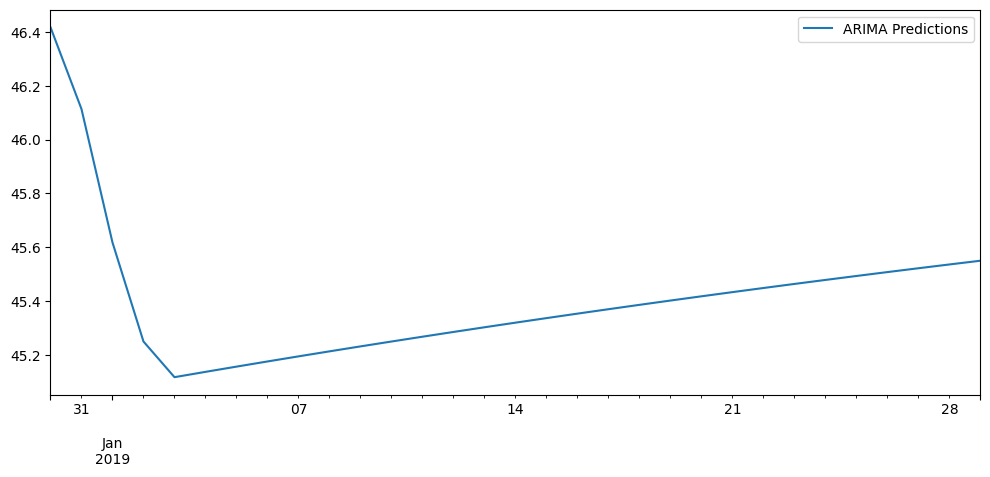

In [31]:

pred.plot(figsize=(12,5),legend=True)